In [1]:
import pandas as pd
import numpy as np

In [2]:
file_path = r"C:\Users\Msi\Jupytornotebook\Project\nokia_20260107_132434.csv"

In [3]:
df = pd.read_csv(file_path, sep=';')

In [4]:
df.head()

,,,,,,,,,sep=,Unnamed: 1
Date,Bid,Ask,Opening price,High price,Low price,Closing price,Average price,Total volume,Turnover,Trades
2026-01-05,5.572,5.58,5.55,5.624,5.544,5.564,5.5739,8264169,"46,064,960.84",5583
2026-01-02,5.53,5.536,5.60,5.69,5.524,5.524,5.5987,10532665,"58,973,157.25",6155
2025-12-30,5.578,5.582,5.578,5.62,5.566,5.572,5.5813,7419350,"41,409,807.11",4443
2025-12-29,5.57,5.574,5.57,5.582,5.48,5.578,5.5619,6284061,"34,949,557.4",4641


In [5]:
# Remove unnamed columns
df = df.loc[:, ~df.columns.str.contains("Unnamed")]

# Replace spaces with underscores
df.columns = df.columns.str.replace(" ", "_")

df.head()

,,,,,,,,,sep=
Date,Bid,Ask,Opening price,High price,Low price,Closing price,Average price,Total volume,Turnover
2026-01-05,5.572,5.58,5.55,5.624,5.544,5.564,5.5739,8264169,"46,064,960.84"
2026-01-02,5.53,5.536,5.60,5.69,5.524,5.524,5.5987,10532665,"58,973,157.25"
2025-12-30,5.578,5.582,5.578,5.62,5.566,5.572,5.5813,7419350,"41,409,807.11"
2025-12-29,5.57,5.574,5.57,5.582,5.48,5.578,5.5619,6284061,"34,949,557.4"


In [10]:
for col in df.columns:
    print(repr(col))

'sep='


In [11]:
df = pd.read_csv(
    file_path,
    sep=';',
    decimal='.',
    skiprows=1
)


In [12]:
df.head()


,Date,Bid,Ask,Opening price,High price,Low price,Closing price,Average price,Total volume,Turnover,Trades
0,2026-01-05,5.572,5.580,5.550,5.624,5.544,5.564,5.5739,8264169,"46,064,960.84",5583
1,2026-01-02,5.530,5.536,5.600,5.690,5.524,5.524,5.5987,10532665,"58,973,157.25",6155
2,2025-12-30,5.578,5.582,5.578,5.620,5.566,5.572,5.5813,7419350,"41,409,807.11",4443
3,2025-12-29,5.570,5.574,5.570,5.582,5.480,5.578,5.5619,6284061,"34,949,557.4",4641
4,2025-12-23,5.530,5.536,5.550,5.560,5.510,5.518,5.5286,5491923,"30,359,094.5",3732


In [13]:
df.columns


Index(['Date', 'Bid', 'Ask', 'Opening price', 'High price', 'Low price',
       'Closing price', 'Average price', 'Total volume', 'Turnover', 'Trades'],
      dtype='object')

In [14]:
df = df[["Date", "Closing price"]]
df.head()


,Date,Closing price
0,2026-01-05,5.564
1,2026-01-02,5.524
2,2025-12-30,5.572
3,2025-12-29,5.578
4,2025-12-23,5.518


In [15]:
df["Date"] = pd.to_datetime(df["Date"])
df = df.sort_values("Date").reset_index(drop=True)

df.head()


,Date,Closing price
0,2016-01-08,6.780
1,2016-01-11,6.890
2,2016-01-12,6.895
3,2016-01-13,6.875
4,2016-01-14,6.785


In [16]:
df["Daily_return"] = df["Closing price"].pct_change()
df.head()

,Date,Closing price,Daily_return
0,2016-01-08,6.780,NaN
1,2016-01-11,6.890,0.016224
2,2016-01-12,6.895,0.000726
3,2016-01-13,6.875,-0.002901
4,2016-01-14,6.785,-0.013091


In [17]:
df = df.dropna()


In [18]:
daily_volatility = df["Daily_return"].std()
daily_volatility


0.021434541189401513

In [19]:
annual_volatility = daily_volatility * np.sqrt(252)
annual_volatility


np.float64(0.34026279272356214)

In [20]:
current_price = df["Closing price"].iloc[-1]
current_price


np.float64(5.564)

In [22]:
years = 4
simulations = 5000
annual_vol = annual_volatility

In [23]:
random_returns = np.random.normal(
    loc=0,               # assume zero average growth (conservative)
    scale=annual_vol,    # risk level
    size=(years, simulations)
)

In [25]:
price_paths = np.zeros((years + 1, simulations))
price_paths[0] = current_price

for t in range(1, years + 1):
    price_paths[t] = price_paths[t-1] * (1 + random_returns[t-1])

In [26]:
final_prices = price_paths[-1]

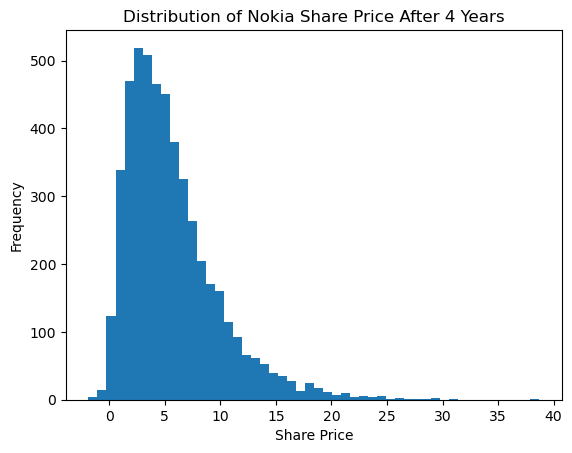

In [27]:
import matplotlib.pyplot as plt

plt.hist(final_prices, bins=50)
plt.title("Distribution of Nokia Share Price After 4 Years")
plt.xlabel("Share Price")
plt.ylabel("Frequency")
plt.show()

In [29]:
import numpy as np

mean_price = np.mean(final_prices)
median_price = np.median(final_prices)
percentile_10 = np.percentile(final_prices, 10)
percentile_90 = np.percentile(final_prices, 90)

mean_price, median_price, percentile_10, percentile_90

(np.float64(5.639904832441132),
 np.float64(4.70311739660279),
 np.float64(1.4088999526960775),
 np.float64(10.991041603721179))

In [30]:
strike_price = current_price
options_per_employee = 1000
number_of_employees = 50


In [31]:
employee_payout = np.maximum(final_prices - strike_price, 0) * options_per_employee


In [32]:
probability_zero_payout = np.mean(employee_payout == 0)
probability_zero_payout


np.float64(0.5934)

In [33]:
average_employee_payout = np.mean(employee_payout)
median_employee_payout = np.median(employee_payout)

average_employee_payout, median_employee_payout


(np.float64(1593.5643656921532), np.float64(0.0))

In [34]:
company_cost = employee_payout * number_of_employees

In [35]:
expected_company_cost = np.mean(company_cost)
worst_case_company_cost = np.percentile(company_cost, 90)

expected_company_cost, worst_case_company_cost


(np.float64(79678.21828460766), np.float64(271352.080186059))